In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [3]:
dataset = pd.read_csv('Google_Stock_Price_Train.csv',index_col="Date",parse_dates=True)


In [4]:
dataset.head()


,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


In [5]:
dataset.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   object 
 4   Volume  1258 non-null   object 
dtypes: float64(3), object(2)
memory usage: 59.0+ KB


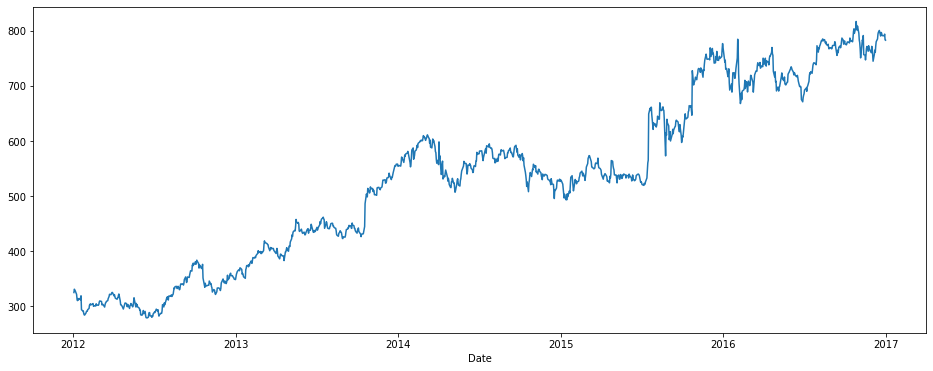

In [7]:
data = dataset['Open']
fig, ax = plt.subplots(figsize=(16, 6))
plt.plot(data.index, data)

ax.set_xlabel('Date')

plt.show()

In [8]:
# convert column "a" of a DataFrame
dataset["Close"] = dataset["Close"].str.replace(',', '').astype(float)


In [9]:
dataset["Volume"] = dataset["Volume"].str.replace(',', '').astype(float)

In [10]:
# 7 day rolling mean
dataset.rolling(7).mean().head(20)

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN,NaN
2012-01-11,323.002857,325.392857,318.682857,643.132857,7.208100e+06
2012-01-12,321.457143,322.882857,316.841429,638.037143,6.691514e+06
2012-01-13,318.698571,319.801429,314.025714,631.870000,6.531857e+06


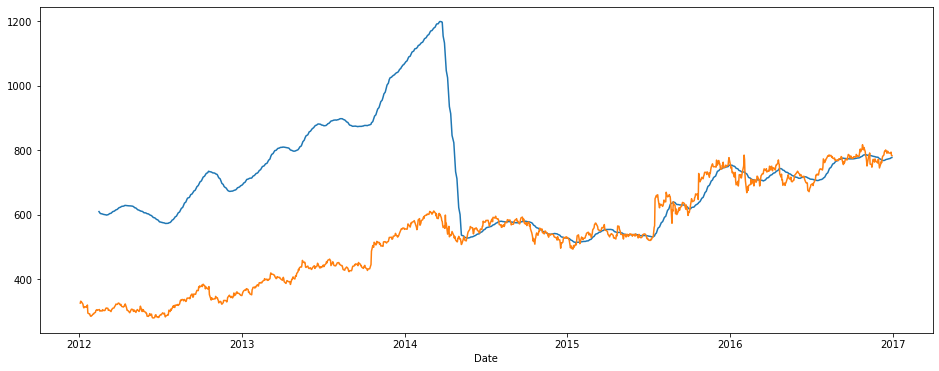

In [11]:

#dataset.drop(['Rolling Mean'],axis=1)
data1 = dataset['RollingMean_close'] = dataset['Close'].rolling(window=30).mean()
data2 = dataset['Open']

fig, ax = plt.subplots(figsize=(16, 6))
plt.plot(data1.index, data1)
plt.plot(data2.index, data2)

ax.set_xlabel('Date')

plt.show()

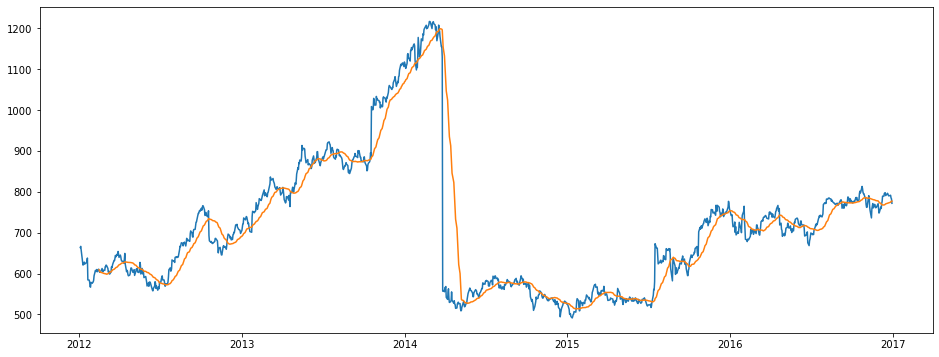

In [12]:
dataset['Close: 30 Day Mean'] = dataset['Close'].rolling(window=30).mean()

fig, ax = plt.subplots(figsize=(16, 6))
mat1 = dataset['Close']
mat2 = dataset['Close: 30 Day Mean']
plt.plot(mat1.index,mat1)
plt.plot(mat2.index,mat2)
plt.show()


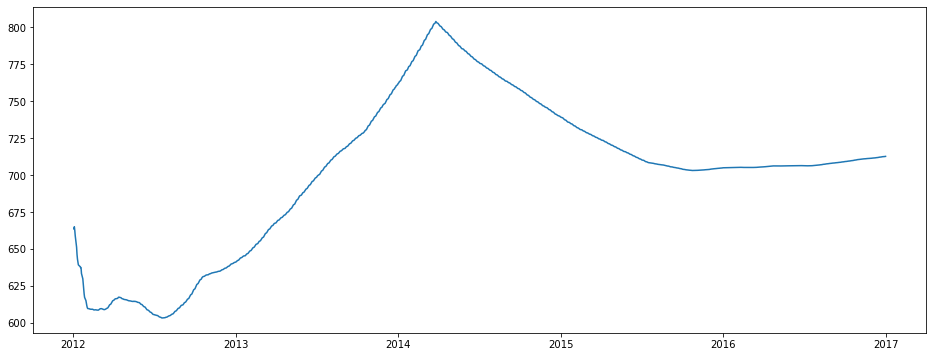

In [13]:
# Optional specify a minimum number of periods
fig, ax = plt.subplots(figsize=(16,6))
pt = dataset['Close'].expanding(min_periods=1).mean()
plt.plot(pt.index,pt)
plt.show()



In [14]:
training_set=dataset['Open']
training_set=pd.DataFrame(training_set)


In [15]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [16]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [17]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout



In [21]:
# Initialising the RNN
regressor = Sequential()



In [22]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))



In [45]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


In [46]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['acc',f1_m,precision_m, recall_m])

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)



Epoch 1/100
38/38 [==============================] - 3s 75ms/step - loss: 0.0018 - acc: 0.0017 - f1_m: 0.5324 - precision_m: 0.5264 - recall_m: 0.5414
Epoch 2/100
38/38 [==============================] - 3s 77ms/step - loss: 0.0016 - acc: 0.0017 - f1_m: 0.5319 - precision_m: 0.5295 - recall_m: 0.5373
Epoch 3/100
38/38 [==============================] - 3s 77ms/step - loss: 0.0013 - acc: 0.0017 - f1_m: 0.5315 - precision_m: 0.5294 - recall_m: 0.5370
Epoch 4/100
38/38 [==============================] - 3s 78ms/step - loss: 0.0014 - acc: 0.0017 - f1_m: 0.5317 - precision_m: 0.5278 - recall_m: 0.5373
Epoch 5/100
38/38 [==============================] - 3s 80ms/step - loss: 0.0014 - acc: 0.0017 - f1_m: 0.5406 - precision_m: 0.5370 - recall_m: 0.5474
Epoch 6/100
38/38 [==============================] - 3s 81ms/step - loss: 0.0014 - acc: 0.0017 - f1_m: 0.5373 - precision_m: 0.5349 - recall_m: 0.5417
Epoch 7/100
38/38 [==============================] - 3s 81ms/step - loss: 0.0016 - acc: 0.0017

38/38 [==============================] - 3s 78ms/step - loss: 0.0012 - acc: 0.0017 - f1_m: 0.5247 - precision_m: 0.5228 - recall_m: 0.5281
Epoch 54/100
38/38 [==============================] - 3s 77ms/step - loss: 0.0013 - acc: 0.0017 - f1_m: 0.5349 - precision_m: 0.5325 - recall_m: 0.5403
Epoch 55/100
38/38 [==============================] - 3s 78ms/step - loss: 0.0012 - acc: 0.0017 - f1_m: 0.5387 - precision_m: 0.5436 - recall_m: 0.5368 ETA: 1s - loss: 0.0013 - acc: 0.0017 - f1_m: 0.5431 - precision_m: 0.5403 -
Epoch 56/100
38/38 [==============================] - 3s 80ms/step - loss: 0.0011 - acc: 0.0017 - f1_m: 0.5295 - precision_m: 0.5278 - recall_m: 0.5323 ETA: 1s - loss: 0.0012 - acc: 0.0000e+00 - f1_m: 0.5325 - precision_m: 0.5288 -
Epoch 57/100
38/38 [==============================] - 3s 81ms/step - loss: 9.6036e-04 - acc: 0.0017 - f1_m: 0.5419 - precision_m: 0.5426 - recall_m: 0.5442
Epoch 58/100
38/38 [==============================] - 3s 77ms/step - loss: 0.0011 - acc: 0.00

NameError: name 'Xtest' is not defined

0.2680920958518982

In [28]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv',index_col="Date",parse_dates=True)



(20, 5)

In [25]:
real_stock_price = dataset_test.iloc[:, 1:2].values
#real_stock_price.shape 

In [76]:
dataset_test.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,778.81,789.63,775.80,786.14,"1,657,300"
2017-01-04,788.36,791.34,783.16,786.90,"1,073,000"
2017-01-05,786.08,794.48,785.02,794.02,"1,335,200"
2017-01-06,795.26,807.90,792.20,806.15,"1,640,200"
2017-01-09,806.40,809.97,802.83,806.65,"1,272,400"


In [29]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-01-03 to 2017-01-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     float64
 1   High    20 non-null     float64
 2   Low     20 non-null     float64
 3   Close   20 non-null     float64
 4   Volume  20 non-null     object 
dtypes: float64(4), object(1)
memory usage: 960.0+ bytes


In [91]:
dataset_test["Volume"] = dataset_test["Volume"].str.replace(',', '').astype(float)

In [92]:
test_set=dataset_test['Open']
test_set=pd.DataFrame(test_set)

In [93]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-01-03 to 2017-01-31
Data columns (total 1 columns):
Open    20 non-null float64
dtypes: float64(1)
memory usage: 320.0 bytes


In [39]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset['Open'], dataset_test['Open']), axis = 0)
#dataset_total
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [40]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.shape

(20, 1)

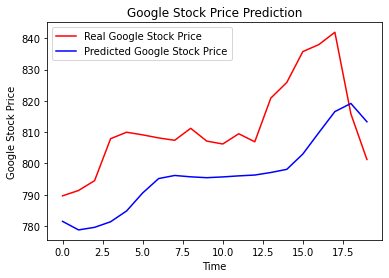

In [82]:

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
